In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import nltk
nltk.download('stopwords')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<AxesSubplot:xlabel='rating', ylabel='count'>

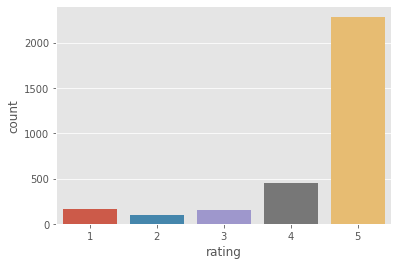

In [8]:
sns.countplot(x='rating', data=df)

In [9]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

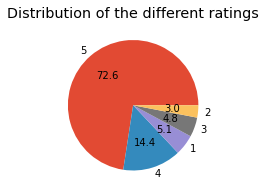

In [10]:
fig = plt.figure(figsize=(3,3))
tags = df['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('Distribution of the different ratings')
plt.show()

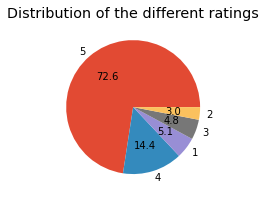

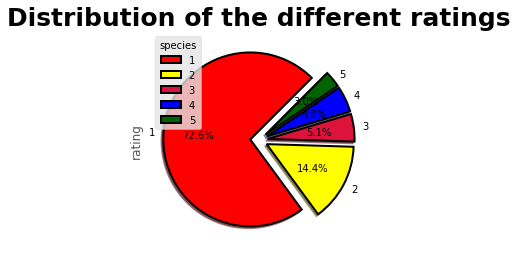

In [11]:
fig = plt.figure(figsize=(3,37))
tags = df['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('Distribution of the different ratings')
plt.show()

fig = plt.figure(figsize=(4,4))
colors = ("red", "yellow", "crimson", "blue", "darkgreen") 
wp = {'linewidth':2, 'edgecolor':"black"} 
data = df['rating'].value_counts()
explode = (0.1,0.1,0.1, 0.1,0.1)
classes = ['1','2','3','4','5']
data.plot(kind='pie', autopct='%0.1f%%',labels=classes, startangle = 45, colors = colors,
         explode = explode, shadow=True, wedgeprops = wp)
plt.legend(title="species")
plt.title("Distribution of the different ratings", loc='center', color='black', fontsize='25', fontweight='bold')
plt.show()

<AxesSubplot:xlabel='count', ylabel='variation'>

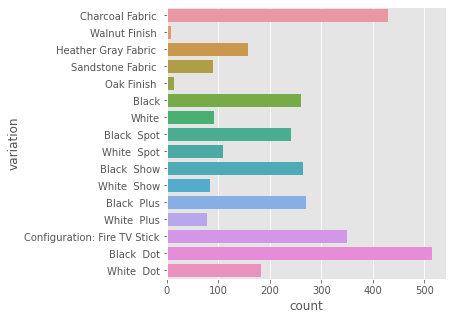

In [41]:
fig = plt.figure(figsize=(5,5))
sns.countplot(y='variation', data=df)

In [13]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

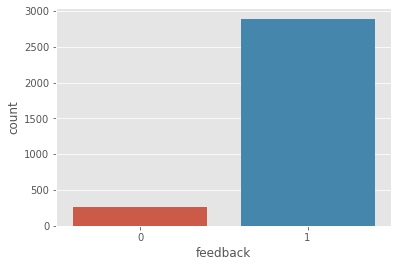

In [14]:
sns.countplot(x='feedback', data=df)
plt.show()

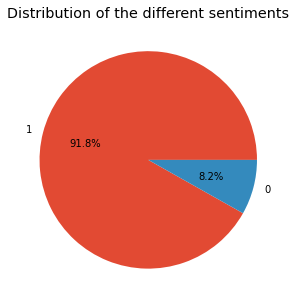

In [15]:
fig = plt.figure(figsize=(5,5))
tags = df['feedback'].value_counts()
tags.plot(kind='pie', autopct="%1.1f%%", label='')
plt.title("Distribution of the different sentiments")
plt.show()

In [16]:
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

Love my Echo! 

1 

Loved it! 

1 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

1 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

1 

Music 

1 



In [17]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [18]:
import nltk
nltk.download('punkt')
  
df.verified_reviews = df['verified_reviews'].apply(data_processing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [20]:
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: stemming(x))

In [21]:
for i in range(5):
    print(df['verified_reviews'].iloc[i], "\n")
    print(df['feedback'].iloc[i], "\n")

love echo 

1 

loved 

1 

sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home 

1 

lot fun thing 4 yr old learns dinosaurs control lights play games like categories nice sound playing music well 

1 

music 

1 



In [22]:
pos_reviews= df[df.feedback==1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [23]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Most frequent words in positive reviews', fontsize=19)
# plt.show()

<Figure size 1440x1080 with 0 Axes>

In [24]:
neg_reviews= df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answers accurately alexa d...,0
111,2,30-Jul-18,Charcoal Fabric,sound terrible u want good music get bose,0
141,1,30-Jul-18,Charcoal Fabric,much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working 2 weeks didnt follow commands ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0


In [25]:
text = ' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title('Most frequent words in negative reviews', fontsize=19)
# plt.show()

<Figure size 1440x1080 with 0 Axes>

In [26]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [27]:
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(df['verified_reviews'])
X = tokenizer.texts_to_sequences(df['verified_reviews'])
X = pad_sequences(X)
X

array([[  0,   0,   0, ...,   0,   1,   2],
       [  0,   0,   0, ...,   0,   0, 175],
       [  0,   0,   0, ...,  71, 260,  21],
       ...,
       [  0,   0,   0, ...,  86,  45,  28],
       [  0,   0,   0, ..., 111, 122, 107],
       [  0,   0,   0, ...,   0,   0,  14]], dtype=int32)

In [28]:
X.shape

(3150, 145)

In [29]:
Y = df['feedback']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2520, 145)
Size of y_train:  (2520,)
Size of x_test:  (630, 145)
Size of y_test:  (630,)


# Preparing data for machine learning

In [44]:
def calculate_confusion(name,y_train, y_pred_train, y_test, y_pred_test):
  
  # Making the Confusion Matrix
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import plot_confusion_matrix

  cm1  = confusion_matrix(y_train, y_pred_train)
  cm2  = confusion_matrix(y_test, y_pred_test)

  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy1  = (cm1[0,0] + cm1[1,1]) / (cm1[0,0] + cm1[0,1] + cm1[1,0] + cm1[1,1])
  precision1  = cm1[1,1] / (cm1[1,1] + cm1[0,1])
  recall1        = cm1[1,1] / (cm1[1,1] + cm1[1,0])

  print('Performance Criteria in Training Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy1)
  print ('precision %.3f' % precision1)
  print('recall %.3f' % recall1)

  ##########################################
  test_calc = pd.concat([pd.DataFrame(y_train).reset_index(drop=True),pd.DataFrame(y_pred_train).reset_index(drop=True)],axis=1)
  test_calc.rename(columns={0: 'predicted'}, inplace=True)

  Accuracy2 = (cm2[0,0] + cm2[1,1]) / (cm2[0,0] + cm2[0,1] + cm2[1,0] + cm2[1,1])
  precision2 = cm2[1,1] / (cm2[1,1] + cm2[0,1])
  recall2       = cm2[1,1] / (cm2[1,1] + cm2[1,0])

  print('====================')
  print('Performance Criteria in Testing Case for %s' %name)
  print('Accuracy  %.3f' %Accuracy2)
  print ('precision %.3f' % precision2)
  print('recall %.3f' % recall2)

  cm_train = pd.DataFrame(cm1, range(2), range(2))
  cm_test  = pd.DataFrame(cm2, range(2), range(2))

  f,(ax1,ax2) = plt.subplots(1,2,figsize=(7, 3), sharey=True)

  g1 = sns.heatmap(cm_train,cbar=False,ax=ax1,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g1.set_title('Training case',fontname= 'serif',fontsize=10, color='k')

  g2 = sns.heatmap(cm_test,cbar=False,ax=ax2,annot=True, fmt=".1f",cmap="viridis",annot_kws={"size": 15})
  g2.set_title('Testing case', fontname= 'serif',fontsize=10, color='k')
  
  f.suptitle(' Confusion matrix for '+name, fontsize=11)
  plt.savefig(name + ".png")
  plt.show()

In [46]:
#set up plotting area
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance Criteria in Training Case for LR
Accuracy  0.922
precision 0.925
recall 0.996
Performance Criteria in Testing Case for LR
Accuracy  0.906
precision 0.913
recall 0.991


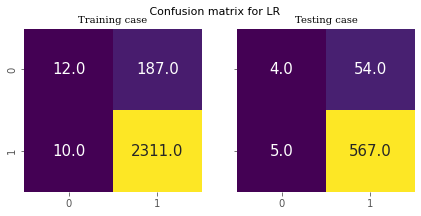

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Performance Criteria in Training Case for SVM
Accuracy  0.937
precision 0.936
recall 1.000
Performance Criteria in Testing Case for SVM
Accuracy  0.913
precision 0.912
recall 1.000


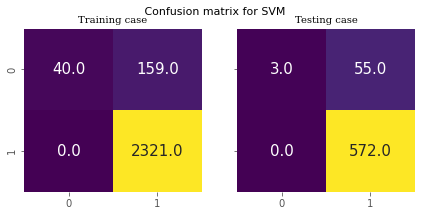

Performance Criteria in Training Case for GBC
Accuracy  0.944
precision 0.943
recall 1.000
Performance Criteria in Testing Case for GBC
Accuracy  0.913
precision 0.918
recall 0.993


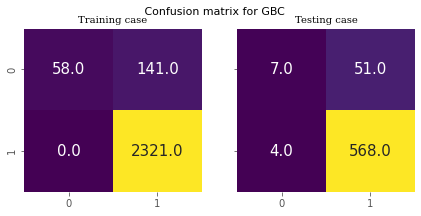

Performance Criteria in Training Case for GNB
Accuracy  0.086
precision 1.000
recall 0.008
Performance Criteria in Testing Case for GNB
Accuracy  0.094
precision 1.000
recall 0.002


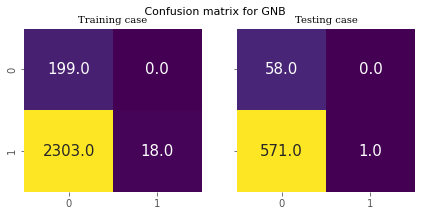

Performance Criteria in Training Case for KNC
Accuracy  0.925
precision 0.927
recall 0.996
Performance Criteria in Testing Case for KNC
Accuracy  0.906
precision 0.910
recall 0.995


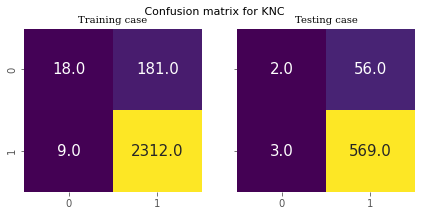

Performance Criteria in Training Case for DT
Accuracy  0.991
precision 0.991
recall 1.000
Performance Criteria in Testing Case for DT
Accuracy  0.905
precision 0.937
recall 0.960


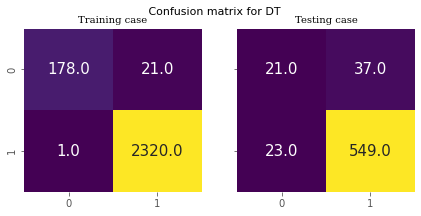

Performance Criteria in Training Case for RFC
Accuracy  0.991
precision 0.991
recall 1.000
Performance Criteria in Testing Case for RFC
Accuracy  0.937
precision 0.935
recall 1.000


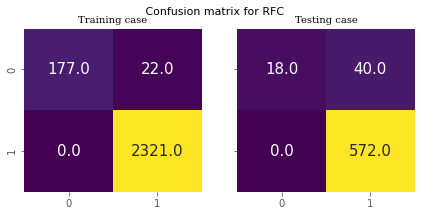

Performance Criteria in Training Case for ANN
Accuracy  0.921
precision 0.921
recall 1.000
Performance Criteria in Testing Case for ANN
Accuracy  0.908
precision 0.908
recall 1.000


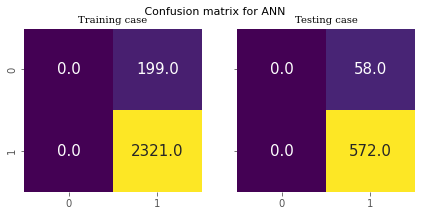

In [47]:
# We now prepare our selected models
models  = []
results   = []
names   = []
scoring  = 'accuracy'
names   = ['LRC', 'SVC', 'GBC', 'GNB', 'RFC', 'KNC']

#LogisticRegression ####################################
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)
calculate_confusion("LR",y_train, y_pred_train, y_test, y_pred_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(lr, x_train, y_train)
results.append(cv_results)

#SVM ####################################
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test  = svm.predict(x_test)
calculate_confusion("SVM",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_SVC.png')
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(svm, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr2,tpr2,label="SVC, AUC="+str(auc))

#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred_train = GBC.predict(x_train)
y_pred_test  = GBC.predict(x_test)
calculate_confusion("GBC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_GBC.png')
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GBC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr3,tpr3,label="GBC, AUC="+str(auc))

#GaussianNB
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_train = GNB.predict(x_train)
y_pred_test  = GNB.predict(x_test)
calculate_confusion("GNB",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_GNB.png')
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(GNB, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr4,tpr4,label="GaussianNB, AUC="+str(auc))

# A random forest classifier.
# A random forest is a meta estimator that fits a number of decision tree 
# classifiers on various sub-samples of the dataset and uses averaging to 
# improve the predictive accuracy and control over-fitting. The sub-sample size 
# is controlled with the max_samples parameter if bootstrap=True (default), 
# otherwise the whole dataset is used to build each tree.

# KNN Model
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
y_pred_train = KNC.predict(x_train)
y_pred_test  = KNC.predict(x_test)
calculate_confusion("KNC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_KNC.png')
fpr5, tpr5, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(KNC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr5,tpr5,label="KNN, AUC="+str(auc))

# Decision Tree Model
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
y_pred_test  = DT.predict(x_test)
calculate_confusion("DT",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_KNC.png')
fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(DT, x_train, y_train)
results.append(cv_results)
# tree.plot_tree(clf)
# ax1.plot(fpr6,tpr6,label="DT, AUC="+str(auc))

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
RFC.fit(x_train, y_train)
y_pred_train = RFC.predict(x_train)
y_pred_test  = RFC.predict(x_test)
calculate_confusion("RFC",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_RFC.png')
fpr7, tpr7, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(RFC, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr7,tpr7,label="RandomForestClassifier, AUC="+str(auc))

#Neural network
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ANN.fit(x_train, y_train)
y_pred_train = ANN.predict(x_train)
y_pred_test  = ANN.predict(x_test)
calculate_confusion("ANN",y_train, y_pred_train, y_test, y_pred_test)
# plt.savefig('ConfMatrix_RFC.png')
fpr8, tpr8, _ = metrics.roc_curve(y_test, y_pred_test)
auc = round(metrics.roc_auc_score(y_test, y_pred_test), 4)
cv_results = cross_val_score(ANN, x_train, y_train)
results.append(cv_results)
# ax1.plot(fpr8,tpr8,label="MLPClassifier, AUC="+str(auc))

In [33]:
model = Sequential()
model.add(Embedding(500, 120, input_length= X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 145, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 145, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                47360     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 107,425
Trainable params: 107,425
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
79/79 [==============================] - 19s 181ms/step - loss: 0.3195 - accuracy: 0.9171
Epoch 2/10
79/79 [==============================] - 9s 117ms/step - loss: 0.2310 - accuracy: 0.9222
Epoch 3/10
79/79 [==============================] - 10s 131ms/step - loss: 0.1565 - accuracy: 0.9433
Epoch 4/10
79/79 [==============================] - 10s 132ms/step - loss: 0.1254 - accuracy: 0.9516
Epoch 5/10
79/79 [==============================] - 10s 131ms/step - loss: 0.1338 - accuracy: 0.9429
Epoch 6/10
79/79 [==============================] - 13s 171ms/step - loss: 0.0972 - accuracy: 0.9639
Epoch 7/10
79/79 [==============================] - 9s 114ms/step - loss: 0.0826 - accuracy: 0.9679
Epoch 8/10
79/79 [==============================] - 10s 131ms/step - loss: 0.0752 - accuracy: 0.9706
Epoch 9/10
79/79 [==============================] - 10s 130ms/step - loss: 0.0635 - accuracy: 0.9778
Epoch 10/10
79/79 [==============================] - 10s 132ms/step - loss: 0.0550 - accuracy

In [35]:
Scores = model.evaluate(x_test, y_test)
print("Accuracy = %0.3f%%"%(Scores[1]*100))

20/20 [==============================] - 1s 32ms/step - loss: 0.2537 - accuracy: 0.9254
Accuracy = 92.540%


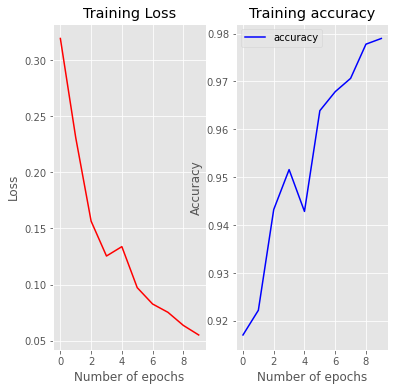

In [36]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Model configuration 2 

In [37]:
model = Sequential()
model.add(Embedding(500, 120, input_length= X.shape[1]))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 145, 120)          60000     
                                                                 
 lstm_1 (LSTM)               (None, 32)                19584     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 79,617
Trainable params: 79,617
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
79/79 [==============================] - 9s 86ms/step - loss: 0.3160 - accuracy: 0.9183
Epoch 2/10
79/79 [==============================] - 7s 94ms/step - loss: 0.2170 - accuracy: 0.9230
Epoch 3/10
79/79 [==============================] - 18s 233ms/step - loss: 0.1470 - accuracy: 0.9452
Epoch 4/10
79/79 [==============================] - 16s 199ms/step - loss: 0.1106 - accuracy: 0.9591
Epoch 5/10
79/79 [==============================] - 8s 103ms/step - loss: 0.0903 - accuracy: 0.9635
Epoch 6/10
79/79 [==============================] - 10s 131ms/step - loss: 0.0780 - accuracy: 0.9714
Epoch 7/10
79/79 [==============================] - 8s 95ms/step - loss: 0.0687 - accuracy: 0.9778
Epoch 8/10
79/79 [==============================] - 7s 87ms/step - loss: 0.0611 - accuracy: 0.9778
Epoch 9/10
79/79 [==============================] - 8s 99ms/step - loss: 0.0515 - accuracy: 0.9798
Epoch 10/10
79/79 [==============================] - 6s 81ms/step - loss: 0.0456 - accuracy: 0.9837


In [39]:
Scores = model.evaluate(x_test, y_test)
print("Accuracy = %0.3f%%"%(Scores[1]*100))

20/20 [==============================] - 1s 20ms/step - loss: 0.2524 - accuracy: 0.9222
Accuracy = 92.222%


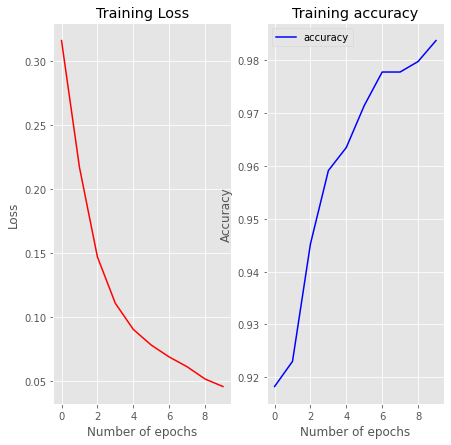

In [40]:
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()